In [68]:
import pandas as pd

data = pd.read_csv("Preprocessed_BRCA_RNA_data_normalized.csv")

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [3]:
data.head(3)

,Sample-id,Class,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
0,TCGA-3C-AAAU-01A-11R-A41B-07,non-TNBC,0.0000,16.3644,12.9316,52.1503,408.0760,0.0,1187.0050,0.0000,...,129.5917,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0
1,TCGA-3C-AALI-01A-11R-A41B-07,non-TNBC,0.0000,9.2659,17.3790,69.7553,563.8934,0.0,516.0413,1.0875,...,59.8151,448.6134,1343.1213,198.4774,603.5889,5504.6221,1318.6514,406.7428,926.5905,0.0
2,TCGA-3C-AALJ-01A-31R-A41B-07,non-TNBC,0.9066,11.6228,9.2294,154.2974,1360.8341,0.0,592.0218,0.0000,...,35.3581,533.9982,768.8123,331.8223,532.1850,5458.7489,942.8830,509.5195,35.3581,0.0


In [4]:
data.columns[0]

'Sample-id'

In [5]:
data['Sample-id']

0       TCGA-3C-AAAU-01A-11R-A41B-07
1       TCGA-3C-AALI-01A-11R-A41B-07
2       TCGA-3C-AALJ-01A-31R-A41B-07
3       TCGA-3C-AALK-01A-11R-A41B-07
4       TCGA-4H-AAAK-01A-12R-A41B-07
                    ...             
1090    TCGA-WT-AB44-01A-11R-A41B-07
1091    TCGA-XX-A899-01A-11R-A36F-07
1092    TCGA-XX-A89A-01A-11R-A36F-07
1093    TCGA-Z7-A8R5-01A-42R-A41B-07
1094    TCGA-Z7-A8R6-01A-11R-A41B-07
Name: Sample-id, Length: 1095, dtype: object

In [6]:
labels = data['Class']

In [7]:
labels.head()

0    non-TNBC
1    non-TNBC
2    non-TNBC
3    non-TNBC
4    non-TNBC
Name: Class, dtype: object

In [8]:
X = data.drop(data.columns[0:2], axis=1)

In [9]:
X.head()

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
0,0.0000,16.3644,12.9316,52.1503,408.0760,0.0,1187.0050,0.0000,0.0000,0.0,...,129.5917,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0
1,0.0000,9.2659,17.3790,69.7553,563.8934,0.0,516.0413,1.0875,0.5438,0.0,...,59.8151,448.6134,1343.1213,198.4774,603.5889,5504.6221,1318.6514,406.7428,926.5905,0.0
2,0.9066,11.6228,9.2294,154.2974,1360.8341,0.0,592.0218,0.0000,0.0000,0.0,...,35.3581,533.9982,768.8123,331.8223,532.1850,5458.7489,942.8830,509.5195,35.3581,0.0
3,0.0000,12.0894,11.0799,143.8643,865.5358,0.0,552.7513,0.4137,0.0000,0.0,...,55.0269,437.7327,863.8808,175.4241,607.3645,5691.3529,781.1336,700.8688,66.6115,0.0
4,0.0000,6.8468,14.4298,84.2128,766.3830,0.0,260.8511,0.4255,0.0000,0.0,...,48.9362,424.2553,1049.7872,14.0426,775.7447,4041.7021,831.9149,881.7021,187.2340,0.0


In [45]:
Y = labels

In [48]:
Y = pd.DataFrame(data=Y, columns=['Class'])

In [49]:
Y

,Class
0,non-TNBC
1,non-TNBC
2,non-TNBC
3,non-TNBC
4,non-TNBC
...,...
1090,non-TNBC
1091,non-TNBC
1092,non-TNBC
1093,non-TNBC


In [13]:
X

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
0,0.0000,16.3644,12.9316,52.1503,408.0760,0.0,1187.0050,0.0000,0.0000,0.0,...,129.5917,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0000
1,0.0000,9.2659,17.3790,69.7553,563.8934,0.0,516.0413,1.0875,0.5438,0.0,...,59.8151,448.6134,1343.1213,198.4774,603.5889,5504.6221,1318.6514,406.7428,926.5905,0.0000
2,0.9066,11.6228,9.2294,154.2974,1360.8341,0.0,592.0218,0.0000,0.0000,0.0,...,35.3581,533.9982,768.8123,331.8223,532.1850,5458.7489,942.8830,509.5195,35.3581,0.0000
3,0.0000,12.0894,11.0799,143.8643,865.5358,0.0,552.7513,0.4137,0.0000,0.0,...,55.0269,437.7327,863.8808,175.4241,607.3645,5691.3529,781.1336,700.8688,66.6115,0.0000
4,0.0000,6.8468,14.4298,84.2128,766.3830,0.0,260.8511,0.4255,0.0000,0.0,...,48.9362,424.2553,1049.7872,14.0426,775.7447,4041.7021,831.9149,881.7021,187.2340,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.0000,0.0000,3.2580,42.2643,1877.4180,0.0,704.5408,4.0725,0.0000,0.0,...,24.4349,243.5349,772.9587,98.5543,315.2108,10937.0800,800.6516,443.0869,724.9033,0.0000
1091,0.0000,14.3858,21.4409,137.7756,652.7559,0.0,427.1654,2.7559,0.0000,0.0,...,70.8661,643.7008,1266.5354,21.2598,688.1890,5118.1102,1933.8583,670.0787,98.4252,0.0000
1092,0.0000,22.3240,27.2744,64.1427,722.7208,0.0,376.4761,0.4724,0.0000,0.0,...,48.6538,341.5210,1375.5314,164.3836,746.8115,5477.5626,1437.4114,953.7081,235.2385,0.9447
1093,0.0000,2.2638,7.2933,85.0461,1140.2801,0.0,252.0682,0.5973,0.0000,0.0,...,32.2552,248.4843,796.2249,51.9667,505.9284,6675.6264,754.4127,750.8288,238.9272,0.0000


In [13]:
tsne = TSNE(n_components=2, random_state=0)
tsne_rnaexp = tsne.fit_transform(X)

In [14]:
tsne_df = pd.DataFrame(data=tsne_rnaexp, columns=['tsne 1', 'tsne 2'])

In [15]:
tsne_df.head()

,tsne 1,tsne 2
0,21.953516,3.237878
1,-11.747526,-3.060462
2,-10.379049,-6.970910
3,-25.781027,-19.638237
4,-21.440159,-29.969938


In [16]:
tsne_concat_df = pd.concat([tsne_df, Y['Class']], axis=1)


In [17]:
tsne_concat_df.head()

,tsne 1,tsne 2,Class
0,21.953516,3.237878,non-TNBC
1,-11.747526,-3.060462,non-TNBC
2,-10.379049,-6.970910,non-TNBC
3,-25.781027,-19.638237,non-TNBC
4,-21.440159,-29.969938,non-TNBC


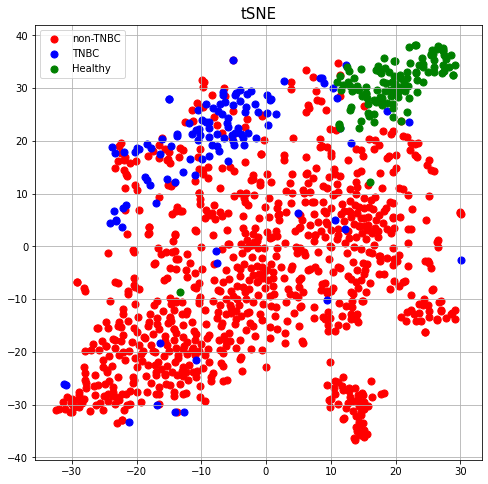

In [24]:
fig_2 = plt.figure(figsize=(8,8))
ax_2 = fig_2.add_subplot(1,1,1)
ax_2.set_title('tSNE', fontsize=15)
labels_list_2 = ['non-TNBC', 'TNBC', 'Healthy']
colors_2 = ['r', 'b', 'g']

for lab, color in zip(labels_list_2, colors_2):
    indices_2 = tsne_concat_df['Class'] == lab
    ax_2.scatter(tsne_concat_df.loc[indices_2, 'tsne 1'],
              tsne_concat_df.loc[indices_2, 'tsne 2'], 
              c = color,
              s = 50)
    ax_2.legend(labels_list_2)
    ax_2.grid()

In [25]:
pca = PCA(n_components=2)
principal_component = pca.fit_transform(X)


In [26]:
principal_df = pd.DataFrame(data=principal_component, columns=['Principal Component 1', 'Principal Component 2'])

In [31]:
principal_df.head()

,Principal Component 1,Principal Component 2
0,-142189.631911,57798.573049
1,29581.731412,-31819.304893
2,35173.655456,-28473.305312
3,339119.606511,-12567.198970
4,422205.362521,-1349.252197


In [32]:
concat_df = pd.concat([principal_df, Y['Class']], axis=1)

In [33]:
concat_df.head()

,Principal Component 1,Principal Component 2,Class
0,-142189.631911,57798.573049,non-TNBC
1,29581.731412,-31819.304893,non-TNBC
2,35173.655456,-28473.305312,non-TNBC
3,339119.606511,-12567.198970,non-TNBC
4,422205.362521,-1349.252197,non-TNBC


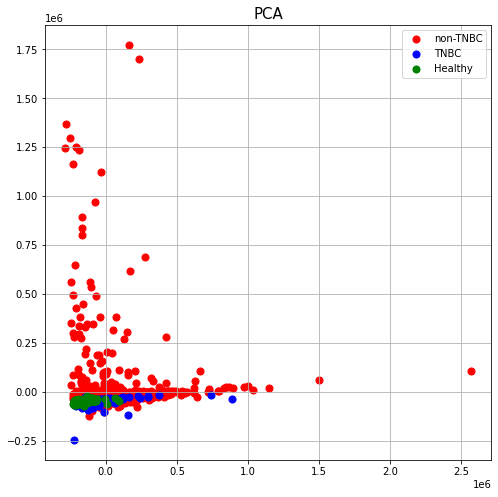

In [34]:

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_title('PCA', fontsize=15)
labels_list =  ['non-TNBC', 'TNBC', 'Healthy']
colors = ['r', 'b', 'g']

for lab, color in zip(labels_list, colors):
    indices = concat_df['Class'] == lab
    ax.scatter(concat_df.loc[indices, 'Principal Component 1'],
              concat_df.loc[indices, 'Principal Component 2'], 
              c = color,
              s = 50)
    ax.legend(labels_list)
    ax.grid()

In [35]:
import umap
X_umap = umap.UMAP().fit_transform(X)

In [36]:
X_umap_df = pd.DataFrame(data=X_umap, columns=['umap 1', 'umap 2'])

In [37]:
X_umap_df.head()

,umap 1,umap 2
0,3.991365,6.262635
1,3.886215,3.281989
2,3.833940,3.392907
3,3.808473,0.673302
4,4.757294,0.148871


In [38]:
X_umap_df_concat = pd.concat([X_umap_df, Y['Class']], axis=1)
X_umap_df_concat.head()

,umap 1,umap 2,Class
0,3.991365,6.262635,non-TNBC
1,3.886215,3.281989,non-TNBC
2,3.833940,3.392907,non-TNBC
3,3.808473,0.673302,non-TNBC
4,4.757294,0.148871,non-TNBC


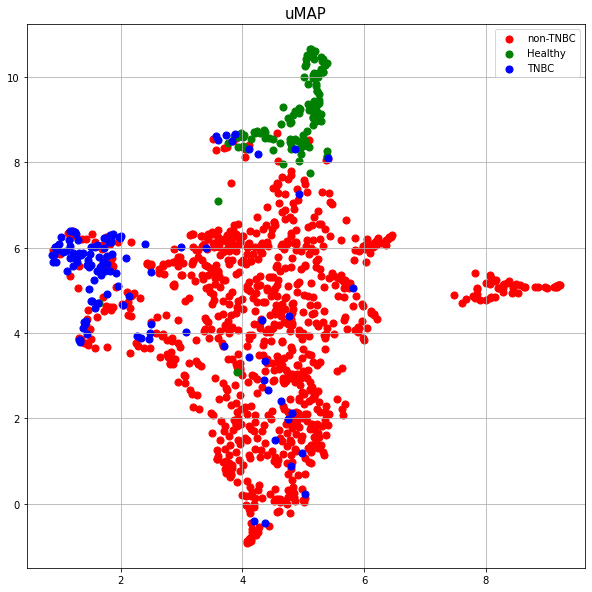

In [39]:

fig_3 = plt.figure(figsize=(10,10))
ax_3 = fig_3.add_subplot(1,1,1)
ax_3.set_title('uMAP', fontsize=15)
labels_list_3 =  ['non-TNBC', 'Healthy', 'TNBC']
colors_3 = ['r', 'g', 'b']

for lab, color in zip(labels_list_3, colors_3):
    indices_3 = X_umap_df_concat['Class'] == lab
    ax_3.scatter(X_umap_df_concat.loc[indices_3, 'umap 1'],
              X_umap_df_concat.loc[indices_3, 'umap 2'], 
              c = color,
              s = 50)
    ax_3.legend(labels_list_3)
    ax_3.grid()

In [40]:
from sklearn.model_selection import train_test_split
X1 = tsne_concat_df.drop(['Class'],axis=1)
Y1 = tsne_concat_df['Class']

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.25, random_state = 10)

In [41]:
lsvc_model = SVC(kernel = 'linear', random_state = 10)
lsvc_model.fit(X1_train, Y1_train) 
Y1_pred = lsvc_model.predict(X1_test)

print('train score: '+str(lsvc_model.score(X1_train,Y1_train)))
print('test score:  '+str(lsvc_model.score(X1_test,Y1_test)))

train score: 0.876979293544458
test score:  0.8759124087591241


In [42]:
X2 = X_umap_df_concat.drop(['Class'],axis=1)
Y2 = X_umap_df_concat['Class']

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.25, random_state = 10)

In [43]:
lsvc_model2 = SVC(kernel = 'poly', random_state = 10)
lsvc_model2.fit(X2_train, Y2_train) 
Y2_pred = lsvc_model2.predict(X2_test)

print('train score: '+str(lsvc_model2.score(X2_train,Y2_train)))
print('test score:  '+str(lsvc_model2.score(X2_test,Y2_test)))

train score: 0.902557856272838
test score:  0.916058394160584


In [44]:
lsvc_model3 = SVC(kernel = 'rbf', random_state = 10)
lsvc_model3.fit(X2_train, Y2_train) 
Y2_pred = lsvc_model3.predict(X2_test)

print('train score: '+str(lsvc_model3.score(X2_train,Y2_train)))
print('test score:  '+str(lsvc_model3.score(X2_test,Y2_test)))

train score: 0.9062119366626066
test score:  0.9197080291970803


In [45]:
X3 = concat_df.drop(['Class'],axis=1)
Y3 = concat_df['Class']
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size = 0.25, random_state = 10)

In [46]:
lsvc_model4 = SVC(kernel = 'poly', random_state = 10)
lsvc_model4.fit(X3_train, Y3_train) 
Y3_pred = lsvc_model4.predict(X3_test)

print('train score: '+str(lsvc_model4.score(X3_train,Y3_train)))
print('test score:  '+str(lsvc_model4.score(X3_test,Y3_test)))

train score: 0.7892813641900122
test score:  0.7992700729927007


In [47]:
lsvc_model4 = SVC(kernel = 'rbf', random_state = 10)
lsvc_model4.fit(X3_train, Y3_train) 
Y3_pred = lsvc_model4.predict(X3_test)

print('train score: '+str(lsvc_model4.score(X3_train,Y3_train)))
print('test score:  '+str(lsvc_model4.score(X3_test,Y3_test)))

train score: 0.7892813641900122
test score:  0.7992700729927007


In [48]:
lsvc_model4 = SVC(kernel = 'linear', random_state = 10)
lsvc_model4.fit(X3_train, Y3_train) 
Y3_pred = lsvc_model4.predict(X3_test)

print('train score: '+str(lsvc_model4.score(X3_train,Y3_train)))
print('test score:  '+str(lsvc_model4.score(X3_test,Y3_test)))

KeyboardInterrupt: 

In [14]:
X

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
0,0.0000,16.3644,12.9316,52.1503,408.0760,0.0,1187.0050,0.0000,0.0000,0.0,...,129.5917,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0000
1,0.0000,9.2659,17.3790,69.7553,563.8934,0.0,516.0413,1.0875,0.5438,0.0,...,59.8151,448.6134,1343.1213,198.4774,603.5889,5504.6221,1318.6514,406.7428,926.5905,0.0000
2,0.9066,11.6228,9.2294,154.2974,1360.8341,0.0,592.0218,0.0000,0.0000,0.0,...,35.3581,533.9982,768.8123,331.8223,532.1850,5458.7489,942.8830,509.5195,35.3581,0.0000
3,0.0000,12.0894,11.0799,143.8643,865.5358,0.0,552.7513,0.4137,0.0000,0.0,...,55.0269,437.7327,863.8808,175.4241,607.3645,5691.3529,781.1336,700.8688,66.6115,0.0000
4,0.0000,6.8468,14.4298,84.2128,766.3830,0.0,260.8511,0.4255,0.0000,0.0,...,48.9362,424.2553,1049.7872,14.0426,775.7447,4041.7021,831.9149,881.7021,187.2340,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.0000,0.0000,3.2580,42.2643,1877.4180,0.0,704.5408,4.0725,0.0000,0.0,...,24.4349,243.5349,772.9587,98.5543,315.2108,10937.0800,800.6516,443.0869,724.9033,0.0000
1091,0.0000,14.3858,21.4409,137.7756,652.7559,0.0,427.1654,2.7559,0.0000,0.0,...,70.8661,643.7008,1266.5354,21.2598,688.1890,5118.1102,1933.8583,670.0787,98.4252,0.0000
1092,0.0000,22.3240,27.2744,64.1427,722.7208,0.0,376.4761,0.4724,0.0000,0.0,...,48.6538,341.5210,1375.5314,164.3836,746.8115,5477.5626,1437.4114,953.7081,235.2385,0.9447
1093,0.0000,2.2638,7.2933,85.0461,1140.2801,0.0,252.0682,0.5973,0.0000,0.0,...,32.2552,248.4843,796.2249,51.9667,505.9284,6675.6264,754.4127,750.8288,238.9272,0.0000


In [35]:
X

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
0,0.0000,16.3644,12.9316,52.1503,408.0760,0.0,1187.0050,0.0000,0.0000,0.0,...,129.5917,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0000
1,0.0000,9.2659,17.3790,69.7553,563.8934,0.0,516.0413,1.0875,0.5438,0.0,...,59.8151,448.6134,1343.1213,198.4774,603.5889,5504.6221,1318.6514,406.7428,926.5905,0.0000
2,0.9066,11.6228,9.2294,154.2974,1360.8341,0.0,592.0218,0.0000,0.0000,0.0,...,35.3581,533.9982,768.8123,331.8223,532.1850,5458.7489,942.8830,509.5195,35.3581,0.0000
3,0.0000,12.0894,11.0799,143.8643,865.5358,0.0,552.7513,0.4137,0.0000,0.0,...,55.0269,437.7327,863.8808,175.4241,607.3645,5691.3529,781.1336,700.8688,66.6115,0.0000
4,0.0000,6.8468,14.4298,84.2128,766.3830,0.0,260.8511,0.4255,0.0000,0.0,...,48.9362,424.2553,1049.7872,14.0426,775.7447,4041.7021,831.9149,881.7021,187.2340,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.0000,0.0000,3.2580,42.2643,1877.4180,0.0,704.5408,4.0725,0.0000,0.0,...,24.4349,243.5349,772.9587,98.5543,315.2108,10937.0800,800.6516,443.0869,724.9033,0.0000
1091,0.0000,14.3858,21.4409,137.7756,652.7559,0.0,427.1654,2.7559,0.0000,0.0,...,70.8661,643.7008,1266.5354,21.2598,688.1890,5118.1102,1933.8583,670.0787,98.4252,0.0000
1092,0.0000,22.3240,27.2744,64.1427,722.7208,0.0,376.4761,0.4724,0.0000,0.0,...,48.6538,341.5210,1375.5314,164.3836,746.8115,5477.5626,1437.4114,953.7081,235.2385,0.9447
1093,0.0000,2.2638,7.2933,85.0461,1140.2801,0.0,252.0682,0.5973,0.0000,0.0,...,32.2552,248.4843,796.2249,51.9667,505.9284,6675.6264,754.4127,750.8288,238.9272,0.0000


In [37]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)


In [40]:
X_pca = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5'])



In [41]:
X_pca

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5
0,-142189.631990,57798.579990,-69894.571890,32908.682846,-9704.717825
1,29581.731495,-31819.306967,20793.580116,55774.033854,4367.347503
2,35173.655446,-28473.301023,31549.225129,-15366.852572,-17602.131881
3,339119.606597,-12567.198635,4962.364557,2613.181426,3776.138048
4,422205.362577,-1349.250461,-49585.014538,-4116.985917,-5823.773981
...,...,...,...,...,...
1090,98832.016078,-39692.521168,30134.211989,13543.307775,18710.398906
1091,86481.322632,-27627.317351,-21624.596598,-4266.827385,5600.324601
1092,408200.169262,-28511.006598,80287.479276,24695.607788,32302.781496
1093,-120641.050964,-58785.107353,67694.604548,60677.083836,53530.442389


In [42]:
X_pca = X_pca.reset_index()

In [51]:
Y = Y.reset_index()

In [52]:
Y

,index,Class
0,0,non-TNBC
1,1,non-TNBC
2,2,non-TNBC
3,3,non-TNBC
4,4,non-TNBC
...,...,...
1090,1090,non-TNBC
1091,1091,non-TNBC
1092,1092,non-TNBC
1093,1093,non-TNBC


In [53]:
X_pca = pd.concat([X_pca.drop(X_pca.columns[0],axis=1),Y.drop(X_pca.columns[0],axis=1)], axis=1)
X_pca


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Class
0,-142189.631990,57798.579990,-69894.571890,32908.682846,-9704.717825,non-TNBC
1,29581.731495,-31819.306967,20793.580116,55774.033854,4367.347503,non-TNBC
2,35173.655446,-28473.301023,31549.225129,-15366.852572,-17602.131881,non-TNBC
3,339119.606597,-12567.198635,4962.364557,2613.181426,3776.138048,non-TNBC
4,422205.362577,-1349.250461,-49585.014538,-4116.985917,-5823.773981,non-TNBC
...,...,...,...,...,...,...
1090,98832.016078,-39692.521168,30134.211989,13543.307775,18710.398906,non-TNBC
1091,86481.322632,-27627.317351,-21624.596598,-4266.827385,5600.324601,non-TNBC
1092,408200.169262,-28511.006598,80287.479276,24695.607788,32302.781496,non-TNBC
1093,-120641.050964,-58785.107353,67694.604548,60677.083836,53530.442389,non-TNBC


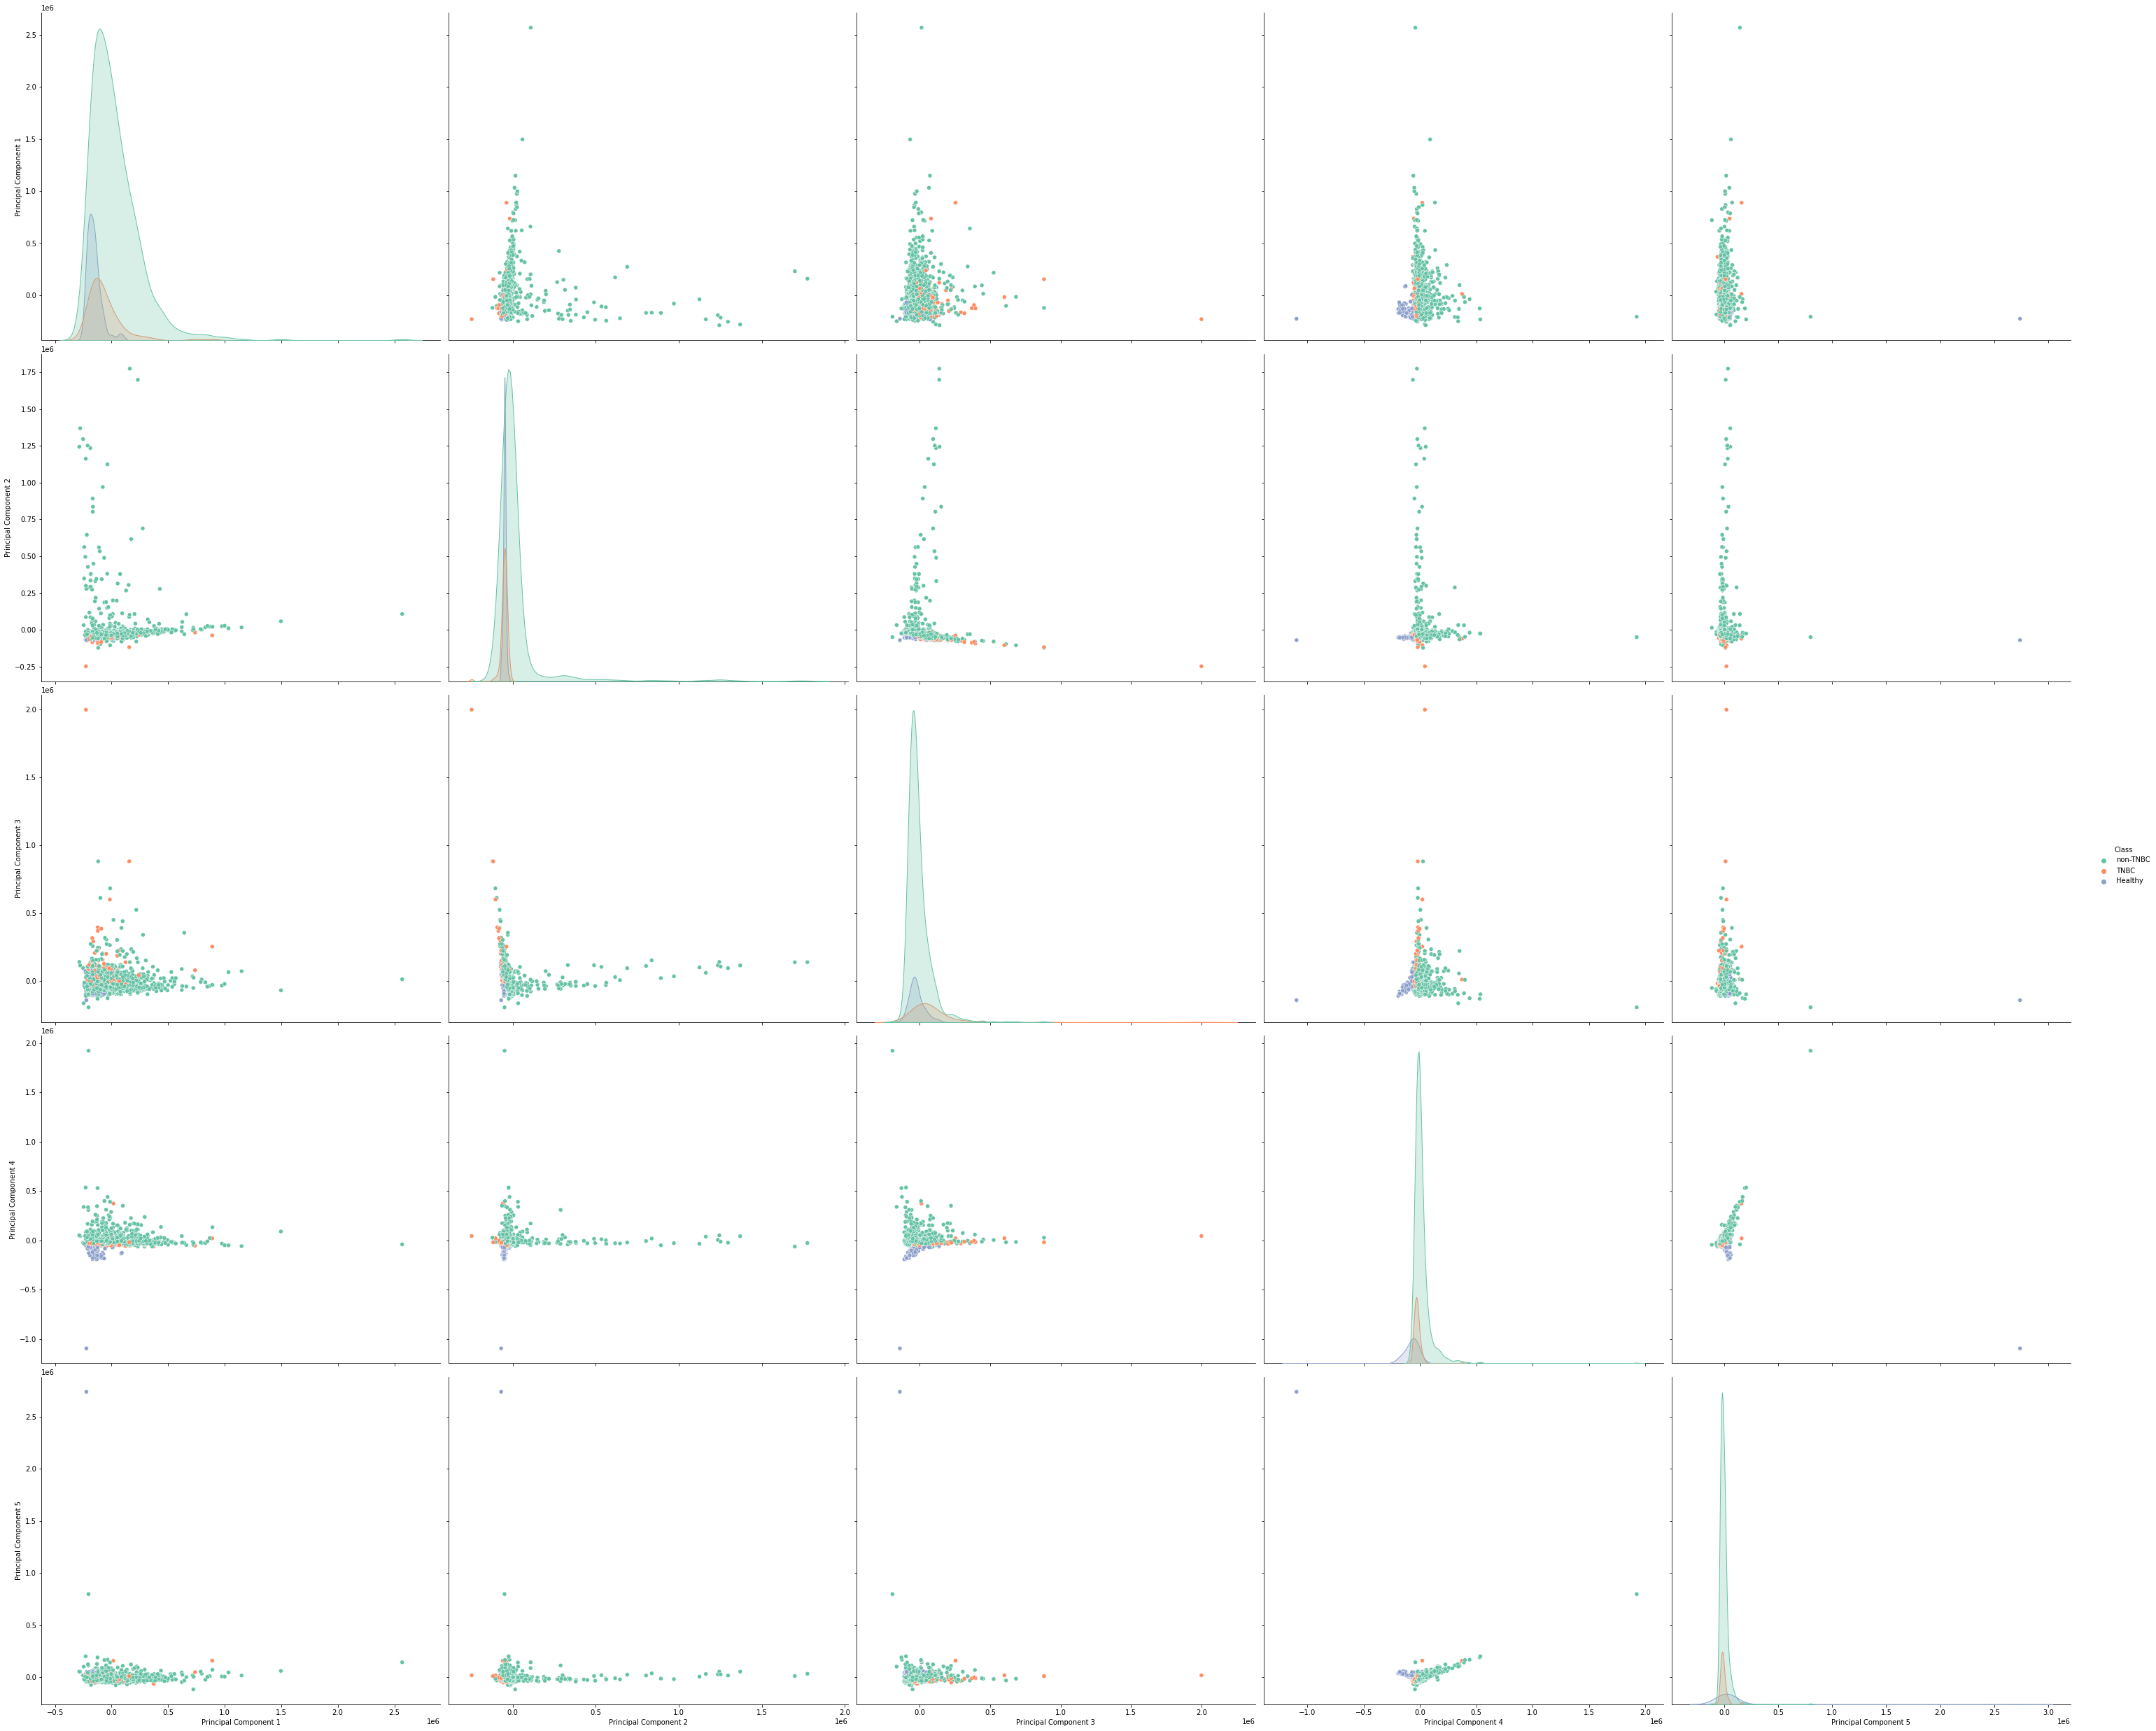

In [67]:
sns.pairplot( data = X_pca, hue="Class",
            height=7,aspect=1.2, palette="Set2")